## First neural network with keras

In [1]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import boston_housing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Get the dataset

In [2]:
housing = boston_housing.load_data()

#### Split it into test and train sets


In [3]:
(X_train, Y_train), (X_test, Y_test) = housing

In [4]:
# Shuffle the training set
order = np.argsort(np.random.random(Y_train.shape))
X_train = X_train[order]
Y_train = Y_train[order]
print("Training set shape = {}".format(X_train.shape))
print("Testing set shape = {}".format(X_test.shape))   

Training set shape = (404, 13)
Testing set shape = (102, 13)


In [5]:
#print(X_train[0])
#print(Y_train[0:10])

#### Data Cleaning

In [6]:
# view the dataset in a more clear shape
column_names = ['CRIM', 'ZN', 'INDUS',
                'CHAS', 'NOX', 'RM',
                'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO',
                'B', 'LSTAT']
df = pd.DataFrame(X_train, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,14.42080,0.0,18.10,0.0,0.740,6.461,93.3,2.0026,24.0,666.0,20.2,27.49,18.05
1,0.03445,82.5,2.03,0.0,0.415,6.162,38.4,6.2700,2.0,348.0,14.7,393.77,7.43
2,0.06466,70.0,2.24,0.0,0.400,6.345,20.1,7.8278,5.0,358.0,14.8,368.24,4.97
3,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77
4,0.17120,0.0,8.56,0.0,0.520,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66


In [7]:
# checking for missing values
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

#### Data Normalization

In [8]:
#Normalization
#mean = X_train.mean(axis=0)
#std = X_train.std(axis=0)
#X_train_norm = (X_train - mean) / std
#X_test_norm = (X_test - mean) / std
#X_train_norm[0]

#### Data Standrdization

In [1]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fit the scaler on training set
scaler.fit(X_train)
# transform method to scale test and training sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled[0]

NameError: name 'X_train' is not defined

# Keras Model 

In [26]:
#Define Keras Model
model = Sequential()
model.add(Dense(128, activation=tf.nn.relu, input_shape=[X_train.shape[1]]))
model.add(Dense(64, activation=tf.nn.relu))
model.add(Dense(32, activation=tf.nn.relu))

# output layer
model.add(Dense(1))


In [27]:
#### Compile the keras model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
#model.compile(optimizer= tf.compat.v1.train.RMSPropOptimizer(0.001), loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               1792      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 12,161
Trainable params: 12,161
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Fitting and saving the model
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=200, batch_size=10)

#history = model.fit(X_train_scaled, Y_train, validation_split=0.2, epochs=100)
#history = model.fit(X_train_scaled, Y_train, validation_split=0.2, epochs=200, verbose=0, batch_size=10,callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/200
37/37 [==============================] - 0s 9ms/step - loss: 484.1569 - mae: 19.9282 - val_loss: 374.2461 - val_mae: 16.8349
Epoch 2/200
37/37 [==============================] - 0s 3ms/step - loss: 144.0140 - mae: 9.2724 - val_loss: 32.9217 - val_mae: 4.9385
Epoch 3/200
37/37 [==============================] - 0s 2ms/step - loss: 32.4253 - mae: 4.0824 - val_loss: 21.6256 - val_mae: 3.9845
Epoch 4/200
37/37 [==============================] - 0s 3ms/step - loss: 21.5484 - mae: 3.2246 - val_loss: 20.3836 - val_mae: 3.6508
Epoch 5/200
37/37 [==============================] - 0s 3ms/step - loss: 17.7357 - mae: 2.9293 - val_loss: 21.0976 - val_mae: 3.6048
Epoch 6/200
37/37 [==============================] - 0s 3ms/step - loss: 15.0761 - mae: 2.7258 - val_loss: 19.6645 - val_mae: 3.6316
Epoch 7/200
37/37 [==============================] - 0s 3ms/step - loss: 13.6632 - mae: 2.5828 - val_loss: 18.5833 - val_mae: 3.4560
Epoch 8/200
37/37 [==============================] - 0s 3ms/step

37/37 [==============================] - 0s 4ms/step - loss: 1.7024 - mae: 0.9619 - val_loss: 12.0314 - val_mae: 2.4029
Epoch 124/200
37/37 [==============================] - 0s 4ms/step - loss: 1.6635 - mae: 0.9599 - val_loss: 13.5009 - val_mae: 2.6672
Epoch 125/200
37/37 [==============================] - 0s 3ms/step - loss: 1.5264 - mae: 0.9123 - val_loss: 13.0531 - val_mae: 2.5453
Epoch 126/200
37/37 [==============================] - 0s 3ms/step - loss: 1.6141 - mae: 0.9440 - val_loss: 13.3048 - val_mae: 2.6152
Epoch 127/200
37/37 [==============================] - 0s 3ms/step - loss: 1.6317 - mae: 0.9377 - val_loss: 16.4030 - val_mae: 3.0998
Epoch 128/200
37/37 [==============================] - 0s 3ms/step - loss: 1.9064 - mae: 1.0700 - val_loss: 11.9973 - val_mae: 2.4550
Epoch 129/200
37/37 [==============================] - 0s 3ms/step - loss: 1.6744 - mae: 0.9536 - val_loss: 13.1016 - val_mae: 2.5503
Epoch 130/200
37/37 [==============================] - 0s 4ms/step - loss: 1

(0.0, 10.0)

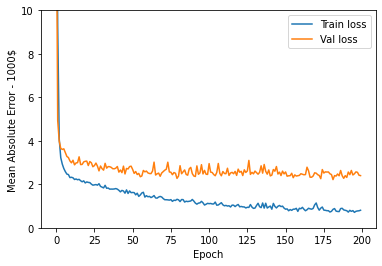

In [29]:
# plotting the model training process
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error - 1000$')
plt.plot(history.epoch, np.array(history.history['mae']),
        label= 'Train loss')
plt.plot(history.epoch, np.array(history.history['val_mae']),
           label = 'Val loss')
plt.legend()

plt.ylim([0,10])

In [30]:
# evaluate the keras model
[loss, mae] = model.evaluate(X_test_scaled, Y_test)
print('loss = {}'.format(loss)) 
print('mean absolute error = {}'.format(mae))

4/4 [==============================] - 0s 4ms/step - loss: 12.8910 - mae: 2.3311
loss = 12.890962600708008
mean absolute error = 2.3311026096343994


#### Model prediction

In [31]:
# prediction on test 
to_predict = X_test_scaled
test_prediction = model.predict(to_predict).flatten()


#for i in range(len(to_predict)):
#    print('%s => (expected %d)' % ( pred[i], Y_train[i]))

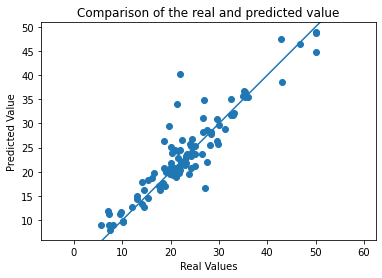

In [32]:

plt.scatter(Y_test, test_prediction)
plt.title('Comparison of the real and predicted value')
plt.xlabel('Real Values')
plt.ylabel('Predicted Value')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100],[-100,100])


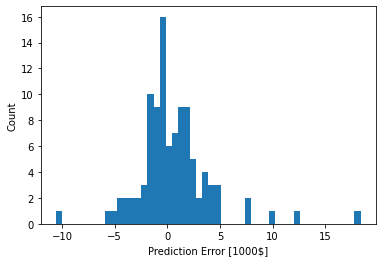

In [33]:
#plot the prediction errors
error = test_prediction - Y_test
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error [1000$]")
_ = plt.ylabel("Count")